In [3]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import skimage 
import keras


In [5]:
SEED = 1000 
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [6]:
from keras.datasets import mnist
from sklearn.model_selection import train_test_split 

(x_train_valid, y_train_valid), (x_test, y_test) = mnist.load_data()

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_valid, y_train_valid, test_size=0.1, random_state=SEED, stratify=y_train_valid)

print("Dimensiones del conjunto de características de train: {}".format(x_train.shape))
print("Dimensiones del conjunto de etiquetas de train: {}".format(y_train.shape))
print()
print("Dimensiones del conjunto de características de valid: {}".format(x_valid.shape))
print("Dimensiones del conjunto de etiquetas de valid: {}".format(y_valid.shape))
print()
print("Dimensiones del conjunto de características de test: {}".format(x_test.shape))
print("Dimensiones del conjunto de etiquetas de test: {}".format(y_test.shape))

11490434/11490434 [==============================] - 19s 2us/step
Dimensiones del conjunto de características de train: (54000, 28, 28)
Dimensiones del conjunto de etiquetas de train: (54000,)

Dimensiones del conjunto de características de valid: (6000, 28, 28)
Dimensiones del conjunto de etiquetas de valid: (6000,)

Dimensiones del conjunto de características de test: (10000, 28, 28)
Dimensiones del conjunto de etiquetas de test: (10000,)


In [7]:
def show_images(images, gray=True):
    fig=plt.figure(figsize=(8, 8))
    index = np.random.randint(len(images), size=100)
    for i in range(100):
        fig.add_subplot(10, 10, i+1)
        plt.axis('off')
        if gray:
            color = 'gray'
        else:
            color = None
        plt.imshow(images[index[i]], cmap=color)
    plt.show()

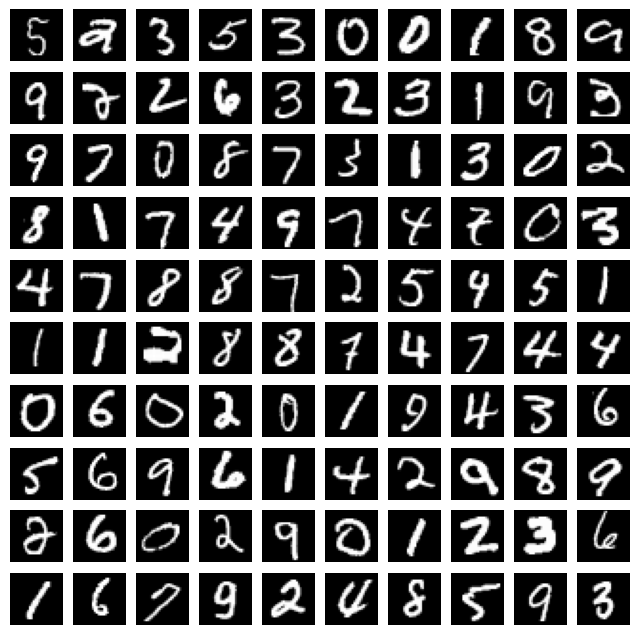

In [8]:
show_images(x_train)

In [9]:
x_train = x_train.astype('float32')
x_train /= 255
x_train = x_train.reshape(x_train.shape[0],-1)
y_train = keras.utils.to_categorical(y_train, num_classes=10)
print("Dimensiones del conjunto de características de train aplanadas: {}".format(x_train.shape))
print("Dimensiones del conjunto de etiquetas de train en one hot: {}".format(y_train.shape))
print()

x_valid = x_valid.astype('float32')
x_valid /= 255
x_valid = x_valid.reshape(x_valid.shape[0],-1)
y_valid = keras.utils.to_categorical(y_valid, num_classes=10)
print("Dimensiones del conjunto de características de train aplanadas: {}".format(x_valid.shape))
print("Dimensiones del conjunto de etiquetas de train en one hot: {}".format(y_valid.shape))
print()


x_test = x_test.astype('float32')
x_test /= 255
x_test = x_test.reshape(x_test.shape[0],-1)
y_test = keras.utils.to_categorical(y_test, num_classes=10)
print("Dimensiones del conjunto de características de test aplanadas: {}".format(x_test.shape))
print("Dimensiones del conjunto de etiquetas de test en one hot: {}".format(y_test.shape))

Dimensiones del conjunto de características de train aplanadas: (54000, 784)
Dimensiones del conjunto de etiquetas de train en one hot: (54000, 10)

Dimensiones del conjunto de características de train aplanadas: (6000, 784)
Dimensiones del conjunto de etiquetas de train en one hot: (6000, 10)

Dimensiones del conjunto de características de test aplanadas: (10000, 784)
Dimensiones del conjunto de etiquetas de test en one hot: (10000, 10)


In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(32, input_shape=(784,), activation='relu')) # Primera capa oculta
model.add(Dense(32, activation='relu')) # Segunda capa oculta
model.add(Dense(10, activation='softmax')) # Salida (10 clases)

In [13]:
from keras.optimizers import SGD

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.1,
    decay_steps=10000,
    #staircase=True,
    decay_rate=1e-6)


sgd = SGD(learning_rate=lr_schedule, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])

In [14]:
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=20, batch_size=128)

Epoch 1/20


422/422 [==============================] - 1s 1ms/step - loss: 0.3111 - acc: 0.9053 - val_loss: 0.1848 - val_acc: 0.9417
Epoch 2/20
422/422 [==============================] - 0s 1ms/step - loss: 0.1361 - acc: 0.9586 - val_loss: 0.1509 - val_acc: 0.9567
Epoch 3/20
422/422 [==============================] - 0s 1ms/step - loss: 0.1014 - acc: 0.9685 - val_loss: 0.1349 - val_acc: 0.9623
Epoch 4/20
422/422 [==============================] - 0s 1ms/step - loss: 0.0844 - acc: 0.9740 - val_loss: 0.1261 - val_acc: 0.9632
Epoch 5/20
422/422 [==============================] - 0s 1ms/step - loss: 0.0754 - acc: 0.9771 - val_loss: 0.1257 - val_acc: 0.9653
Epoch 6/20
422/422 [==============================] - 0s 1ms/step - loss: 0.0706 - acc: 0.9791 - val_loss: 0.1244 - val_acc: 0.9657
Epoch 7/20
422/422 [==============================] - 0s 1ms/step - loss: 0.0679 - acc: 0.9798 - val_loss: 0.1225 - val_acc: 0.9658
Epoch 8/20
422/422 [==============================] - 0s 1ms/step - loss: 

In [15]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


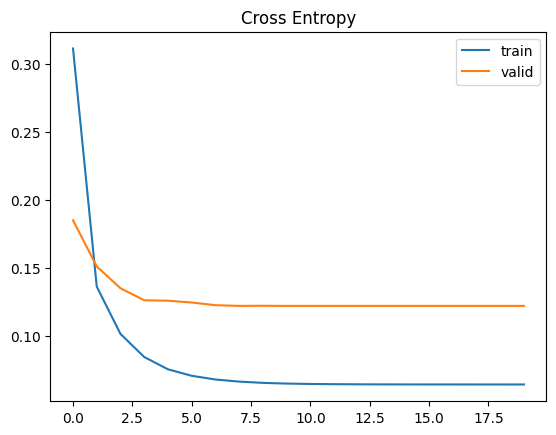

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','valid'])
plt.title('Cross Entropy')
plt.show()

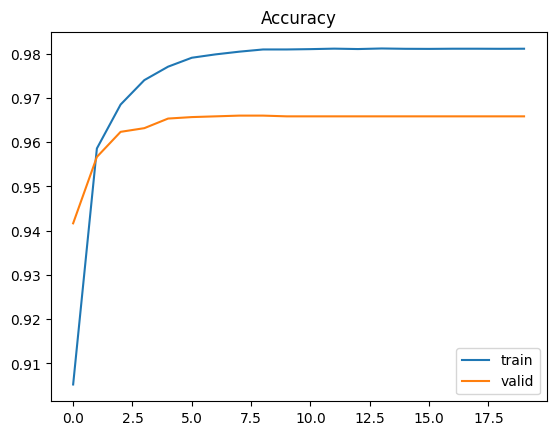

In [17]:
# Mostramos la evolución del accuracy a través de los epoch
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['train','valid'])
plt.title('Accuracy')
plt.show()

313/313 [==============================] - 0s 649us/step


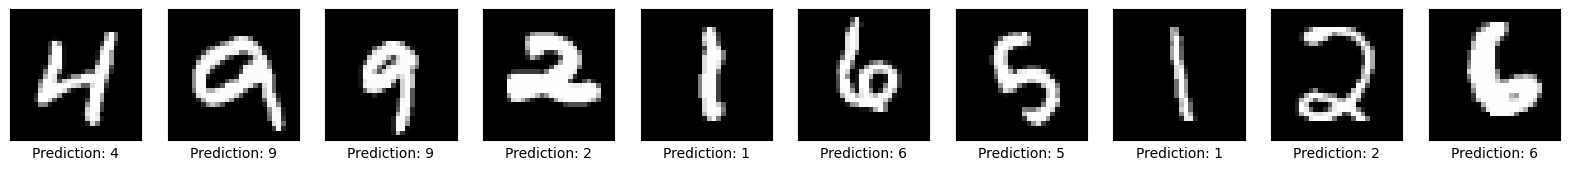

In [21]:
# En este caso nos quedamos con las clases
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Mostramos algunos digitos con las clases predichas
fig=plt.figure(figsize=(20, 8))
index = np.random.randint(len(x_test), size=10)
for i in range(10):
    fig_i = fig.add_subplot(1, 10, i+1)
    fig_i.set_xticks(())
    fig_i.set_yticks(())
    fig_i.set_xlabel("Prediction: {}".format(predicted_classes[index[i]]))
    plt.imshow(x_test[index[i]].reshape((28,28)), cmap='gray')
plt.show()

In [22]:
score = model.evaluate(x_test, y_test)
print()
print("Loss: {}\nAccuracy: {}".format(score[0],score[1]))

313/313 [==============================] - 0s 732us/step - loss: 0.1055 - acc: 0.9691

Loss: 0.10548067837953568
Accuracy: 0.9690999984741211
